### Dish is Sean Connery schpeaking. You there. Come closher...

<img src="https://media1.britannica.com/eb-media/50/66150-004-A27B7E90.jpg" alt="Title" style="width: 200px; height: 200px"/>

### I want to tell you a tale of a man. A hero. Dish is the story... of James Bond (aka Sean Connery).

<img src="https://s-media-cache-ak0.pinimg.com/originals/6f/07/54/6f075401364552cfcb3caf46f9747614.jpg" alt="Title" style="width: 150px; height: 200px"/>

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 

In [1]:
### Print out hish movies below sonny boy. I don't have all day
import urllib2
from bs4 import BeautifulSoup
import json
import pandas as pd

movies_ = []
soup = BeautifulSoup(urllib2.urlopen('https://en.wikipedia.org/wiki/List_of_James_Bond_films').read())
tables = soup.find_all('table')
for idx, table in enumerate(tables):
    if idx == 0:
        for idx2, row in enumerate(table.find_all('tr')):
            if idx2 > 1:
                for idx3, column in enumerate(row.find_all('th')):
                    movies_.append(str(column.text))
print movies_
movies = pd.DataFrame(movies_)
for id1, i in enumerate(movies_):
    for idx, x in enumerate(i):
        if x == '!':
            movies_[id1] = i[idx+1:]
        elif x == '[':
            movies_[id1] = i[:idx]
movies = pd.DataFrame(movies_)
movies.columns = ['Bond Movies']
        

print movies

/Users/dnay/anaconda/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /Users/dnay/anaconda/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


['Dr. No', 'From Russia with Love', 'Goldfinger', 'Thunderball', 'Casino Royale[N]', 'You Only Live Twice', "On Her Majesty's Secret Service", 'Diamonds Are Forever', 'Live and Let Die', 'man with !The Man with the Golden Gun', 'spy who !The Spy Who Loved Me', 'Moonraker', 'For Your Eyes Only', 'Octopussy', 'Never Say Never Again[N]', 'view !A View to a Kill', 'living !The Living Daylights', 'Licence to Kill', 'GoldenEye', 'Tomorrow Never Dies', 'world !The World Is Not Enough', 'Die Another Day', 'Casino Royale', 'Quantum of Solace', 'Skyfall', 'Spectre']
                        Bond Movies
0                            Dr. No
1             From Russia with Love
2                        Goldfinger
3                       Thunderball
4                     Casino Royale
5               You Only Live Twice
6   On Her Majesty's Secret Service
7              Diamonds Are Forever
8                  Live and Let Die
9       The Man with the Golden Gun
10             The Spy Who Loved Me
11   

### That's right boy. Pull the movie's informashon from the webshite below. Just the plot, imdb shcore, poshter, and genre should do.

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
import json
movies_for_func = [i.replace(' ', '+') for i in movies['Bond Movies']]
def get_info_post(i):
    bond_movie = i
    soup = BeautifulSoup(urllib2.urlopen('http://www.omdbapi.com/?y=&plot=short&r=json&t='+bond_movie).read())
    parsed_json = json.loads(soup.text)
    print parsed_json['Plot']
    print parsed_json['imdbRating']
    print parsed_json['Genre']
    return Image(url = parsed_json['Poster'], width=250, height=250)
get_info_post(movies_for_func[10])

James Bond investigates the hijacking of British and Russian submarines carrying nuclear warheads with the help of a KGB agent whose lover he killed.
7.1
Action, Adventure, Thriller


### There were shome low times in the life of James Bond. 
#### *cough* 
#### Go on boy. Show the lowesht rated show's poster.

In [4]:
import operator

dicty = {}
def get_rating(i):
    bond_movie = i
    soup = BeautifulSoup(urllib2.urlopen('http://www.omdbapi.com/?y=&plot=short&r=json&t='+bond_movie).read())
    parsed_json = json.loads(soup.text)
    dicty[i] = float(parsed_json['imdbRating'])

for i in range(0, 26):
    get_rating(movies_for_func[i])

#print sorted(dicty.items(), key=operator.itemgetter(1)), '\n'
#print sorted(dicty.items(), key=operator.itemgetter(1), reverse=True)

from IPython.display import Image
from IPython.core.display import HTML 
soup = BeautifulSoup(urllib2.urlopen('http://www.omdbapi.com/?y=&plot=short&r=json&t=Die+Another+Day').read())
parsed_json = json.loads(soup.text)
Image(url = parsed_json['Poster'], width=250, height=250)

### But there were alsho high times! And glorious they were! Even though shome of them had Denise Richards. 
#### Show the highest rated show's poster. We don't have all day.

In [5]:
soup = BeautifulSoup(urllib2.urlopen('http://www.omdbapi.com/?y=&plot=short&r=json&t=Casino+Royale').read())
parsed_json = json.loads(soup.text)

Image(url = parsed_json['Poster'], width=250, height=250)

### Plot his ratings over time. Has he continued to improve? Is he more badass than ever before?
#### Make a line plot with James Bonds' imdb ratings

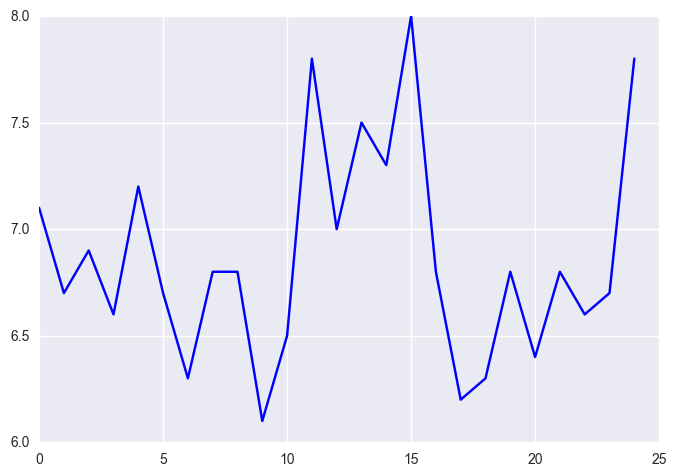

In [6]:
% matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

plt.plot(dicty.values(), color='b')

#### Looks like he'sh making a comeback! And what a comeback it will be! For our last shcell we need to show the world that James Bond movies transhend all boundaries. Let'sh print a count of the genres for all of Mr. Bonds' movies.

In [7]:
listy = []
def get_rating(i):
    bond_movie = i
    soup = BeautifulSoup(urllib2.urlopen('http://www.omdbapi.com/?y=&plot=short&r=json&t='+bond_movie).read())
    parsed_json = json.loads(soup.text)
    listy.append(parsed_json['Genre'])
    return listy
for i in range(26):
    get_rating(movies_for_func[i])
ser = pd.Series(listy)
print ser.value_counts()

Action, Adventure, Thriller    24
Action, Adventure               1
Action, Adventure, Sci-Fi       1
dtype: int64


<img src="https://media1.britannica.com/eb-media/50/66150-004-A27B7E90.jpg" alt="Title" style="width: 200px; height: 200px"/>

## And that's my shtory shonny boy. Like it or not, James Bond was a hell of a guy. This is Sean Connery signing out.